In [223]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Data Cleaning and processing

In [224]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"] = df["TotalCharges"].replace(" " , "0")
df["TotalCharges"] = df["TotalCharges"].astype(float)
df["Churn"] = df["Churn"].replace({'Yes' : '1' , "No" : '0'}).astype("int")


In [225]:
df.loc[df['TotalCharges'] == 0, 'TotalCharges'] = df['MonthlyCharges']

In [226]:
for col in df.columns:
    print(f"{col} : {df[col].unique()}")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [227]:
columns_to_convert = ['Partner', 'Dependents', 'PhoneService', 
                      'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                      'PaperlessBilling', 'Churn']
df[columns_to_convert] = df[columns_to_convert].replace({'No': 0, 'Yes': 1, 'No phone service' : 0, 'No internet service' : 0})
for col in df.columns:
    print(f"{col} : {df[col].unique()}")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


### What are the most popular products by ranking ?

StreamingTV is the most popular products based on the mean churn value followed by Streaming Movies.

In [229]:
productList = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies']

productDictonaryChurnRate = {}

#Take the mean of each service with the mean of the total services its takn  
for col in productList:
    productDictonaryChurnRate[col] = df.groupby(col)['Churn'].mean()

#churn rates combine the products based 0, 1 , Fiber optic , No
#and rank the products based on its mean

churnRates = pd.DataFrame(product_churn_rate)
rankedProducts = churnRates.mean().sort_values(ascending=False)

print(rankedProducts)



StreamingTV         0.272007
StreamingMovies     0.271605
MultipleLines       0.268172
DeviceProtection    0.255769
OnlineBackup        0.253518
TechSupport         0.231763
OnlineSecurity      0.229704
InternetService     0.227523
dtype: float64


### Are there any products/plans that are often purchased together ? If so, then what are the chances of those products being purchased together and separately ?

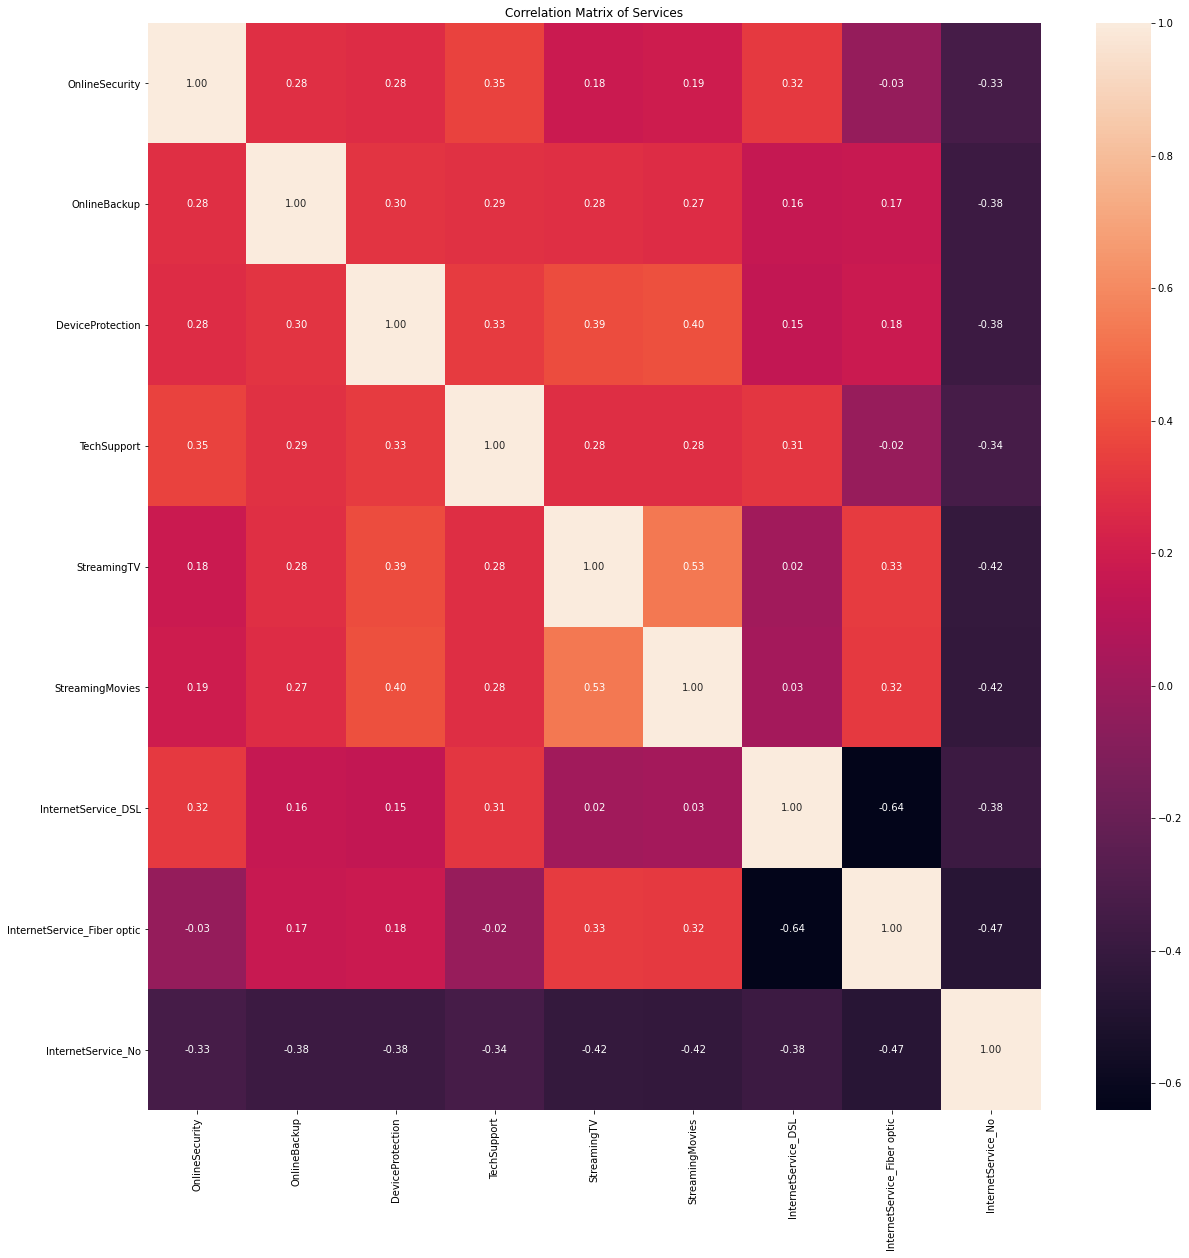

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt
'''Analysis has been given below, check that out!'''

productList = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

correlationData = df[correlation_cols]

# correlation_data.info()
# for col in df.columns:
#     print(f"{col} : {df[col].unique()}")


correlationData = pd.get_dummies(correlationData, drop_first=False)
correlationMatrix = correlationData.corr()

# print(correlation_matrix)

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Services')
plt.show()

1. All the columns are integer except for Internt Service which is a object since it has three data points : DSL, fiber optic and No internet service. To build a correlation between buying two products, its important to provide a one-hot encoding for them. Thus, we make use of pd.get_dummies

2. Using the correlation matrix, we can correlate which products are bought together and seperately. 

Analysis 1: 
A) Together 

i) Medium Positive Correlation
1. Online Security and Tech Support has a positive correlation of 0.35. 
2. Online Security and Internet_Service_DSL has a positive correlation of 0.32.

ii) High Positive Correlation

1. StreamingTV and StreamingMovies have a high positive correlation 0.53 (it may be said that people who watch movies prefer to stream TV also)

B) Seperate

i) High Negative Correlation :

1. Since, we have used one hot encoding on internet connetion, it makes sense when internet service_DSL and internet service_Fiber optic have 0.64 high negative correlation, Since you wont by the together (obviously). [This helps us understand that our our correlation matrix is meaningful)

ii) Medium Negative Correlation :

1. No Internet Service has a negative correlation with almost all services, but goes up 0.42 for services like internt streamin TV and movies which cannot be done without the internet itself.
2. We may somewhat see an interesting use case of fibre optic and tech support. DSL is more correlated to tech support which can raise questions about the easiness of use during analysis.

### 4. Can you cluster customers, based on their purchasing preferences ? Could you list the outliers in this cluster if any ?

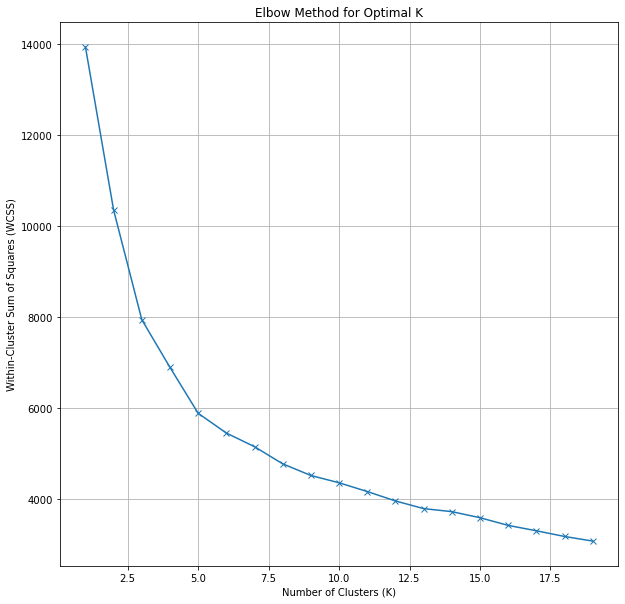

In [259]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

'''
    Correlation data is used to make cluster. We want to find the most optimum value of the clusters. Thus, we plot the 
    elbow method to get the same. We test K values from 1 to 20 to understand the different values.
'''

X = correlationData
wcss = []

for i in range(1, 20):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(10, 10))
plt.plot(range(1, 20), wcss, marker='x')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


Clearly, using the elbow method, we can see that the k = 5 will give the most optimum clusters, thus we will move forward with using this program

In [262]:
# Applying K-means clustering with K=2
km = KMeans(n_clusters=5, init='k-means++', max_iter=200, n_init=10, random_state=0)
correlation_data['Cluster'] = km.fit_predict(X)

clusterCounts = correlation_data['Cluster'].value_counts()

outliersPerCluster = []
for i in range(5):
    distances = np.linalg.norm(clusterPoints - centroid, axis=1)
    clusterPoints = X[correlation_data['Cluster'] == i]
    centroid = kmeans.cluster_centers_[cluster_label]
    outlierIndices = np.argsort(distances)
    outliersPerCluster.append(outlierIndices)

print("Cluster Counts:", clusterCounts)
print("Outliers Per Cluster:", outliersPerCluster)



Cluster Counts: 3    1683
1    1526
4    1413
2    1318
0    1103
Name: Cluster, dtype: int64
Outliers Per Cluster: [array([ 669,  775,  634, ...,  895, 1136,  434]), array([  72, 1012,   78, ...,  372,   60,    0]), array([   0, 1022, 1021, ...,  502,  511, 1525]), array([1086,   62,   68, ...,  768,  845, 1317]), array([1356,  945,  946, ...,  779,  839,  841])]


In [266]:
cluster_means = correlation_data.groupby('Cluster')[selected_features].mean()

for i in range(5):
    print("Feature Mean Values in cluster",i+1, cluster_means.loc[i])


Feature Mean Values in cluster 1 OnlineSecurity      0.212912
OnlineBackup        0.326923
DeviceProtection    0.155220
TechSupport         0.163462
StreamingTV         0.189560
StreamingMovies     0.188874
Name: 0, dtype: float64
Feature Mean Values in cluster 2 OnlineSecurity      0.325598
OnlineBackup        0.367089
DeviceProtection    0.189170
TechSupport         0.273558
StreamingTV         0.159634
StreamingMovies     0.161744
Name: 1, dtype: float64
Feature Mean Values in cluster 3 OnlineSecurity      0.322561
OnlineBackup        0.528659
DeviceProtection    0.689634
TechSupport         0.382927
StreamingTV         0.898780
StreamingMovies     0.900000
Name: 2, dtype: float64
Feature Mean Values in cluster 4 OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Name: 3, dtype: float64
Feature Mean Values in cluster 5 OnlineSecurity      0.717718
OnlineBackup        0.564565
DeviceProtectio

A total of 5 clusters were created from the given dataset, and the mean information has been printed along with the count. The entire outliers have been listed, from which top 10 can simply be extracted from the numpy over the time. I have tried to visualize the graph over time. We have also made use of PCA in this case to test out the dimensionality reduction will improve clustering by reducing the noise in the data by only extracting relevant feature points. We have reduced to 2 clusters for better visualisation

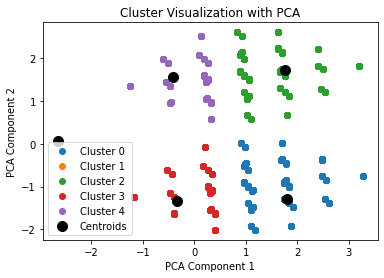

In [281]:
#Visualization of Created clusters by reducing PCA with to 2 dimensions.
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(X_scaled)

km = KMeans(n_clusters=5, init='k-means++', max_iter=200, n_init=10, random_state=0)
correlation_data['Cluster'] = km.fit_predict(transformed_pca)

for i in range(5):
    cluster_points = X_pca[correlation_data['Cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization with PCA')
plt.legend()
plt.show()



### 5. Is there any clear correlation between certain customer types and the types of plan they prefer to purchase ? If so, list those correlations.

In [294]:
CustomerTypes = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for i in CustomerTypes:
    print (Cross_tabulation(df, i, 'Churn'))
    print("\n===================X=================X=========================X==============\n")

Churn      0    1
gender           
Female  2549  939
Male    2625  930

===================X=================X=========================X==============

Churn             0     1
SeniorCitizen            
0              4508  1393
1               666   476

===================X=================X=========================X==============

Churn       0     1
Partner            
0        2441  1200
1        2733   669

===================X=================X=========================X==============

Churn          0     1
Dependents            
0           3390  1543
1           1784   326

===================X=================X=========================X==============



In [293]:
for i in CustomerTypes:
    correlations = df.groupby(i)[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].mean()
    print("Correlations between services and ", i , " :")
    print(correlations)
    print("\n===================X=================X=========================X==============\n")

Correlations between services and  gender  :
        PhoneService  OnlineSecurity  OnlineBackup  DeviceProtection  \
gender                                                                 
Female      0.905103        0.294438      0.351491          0.344897   
Male        0.901266        0.279044      0.338397          0.342897   

        TechSupport  StreamingTV  StreamingMovies  
gender                                             
Female     0.294438     0.388475         0.393062  
Male       0.286076     0.380309         0.382841  

===================X=================X=========================X==============

Correlations between services and  SeniorCitizen  :
               PhoneService  OnlineSecurity  OnlineBackup  DeviceProtection  \
SeniorCitizen                                                                 
0                  0.902050        0.294357      0.330961          0.331469   
1                  0.908932        0.246935      0.416813          0.408056   

        

### 6. Can you use any dimensionality reduction technique to reduce features ? Also could you visualize the entire data as cluster points in a 2 dimensional graph.

T-SNE is helpful since it preserves the clusters Well Explained Video : https://www.youtube.com/watch?v=NEaUSP4YerM. TSNE which is (t-Distributed Stochastic Neighbor Embedding) is useful in visualizing data and for dimensionality reduction by dividing data in clusters. We have converted categorical data into numerical data using sklearns label encoder and have then used TSNE on it

In [299]:
from sklearn.manifold import TSNE
%matplotlib inline
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [382]:
from sklearn.preprocessing import LabelEncoder
def intConvertor(ds):
    if ds.dtype=='object':
        ds = LabelEncoder().fit_transform(ds)
    return ds



new_df = df
new_df = new_df.apply(lambda x: intConvertor(x))
new_df = new_df.drop(columns=['customerID']) 
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


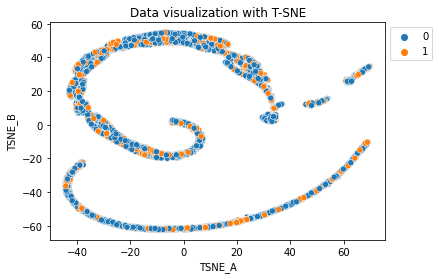

In [384]:
X = new_df  

X_numeric = X.apply(pd.to_numeric, errors='coerce')

X_numeric.dropna(inplace=True)

X_array = X_numeric.values  

tsne = TSNE(n_components=2, init='random', perplexity=100, n_iter=4000)
tsne_results = tsne.fit_transform(X_array)

tsne_df = pd.DataFrame(tsne_results, columns=['TSNE_A', 'TSNE_B'])
tsne_df['CLASS'] = df['Churn']

sns.scatterplot(x='TSNE_A', y='TSNE_B', hue='CLASS', data=tsne_df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Data visualization with T-SNE')
plt.show()